In [120]:
import pandas as pd
from torchvision.transforms import functional as F
from torchvision import transforms
import torch
from PIL import Image
import requests
from io import BytesIO
import torch.nn as nn
import torch.optim as optim

# Data Folder Info (File name and total rows)
Processing anything over a few thousand rows takes forever..I had to focus on files around 1000 rows

In [121]:
import pandas as pd
import os
folder_path = './data'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [122]:
rows_count = {}
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    rows_count[file] = len(df)

In [123]:
rows_count

{'Air Conditioners.csv': 720,
 'All Appliances.csv': 9576,
 'All Books.csv': 0,
 'All Car and Motorbike Products.csv': 1272,
 'All Electronics.csv': 9600,
 'All English.csv': 0,
 'All Exercise and Fitness.csv': 1176,
 'All Grocery and Gourmet Foods.csv': 960,
 'All Hindi.csv': 0,
 'All Home and Kitchen.csv': 1224,
 'All Movies and TV Shows.csv': 0,
 'All Music.csv': 0,
 'All Pet Supplies.csv': 648,
 'All Sports Fitness and Outdoors.csv': 1224,
 'All Video Games.csv': 0,
 'Amazon Fashion.csv': 2352,
 'Amazon Pharmacy.csv': 0,
 'Amazon-Products.csv': 551585,
 'Baby Bath Skin and Grooming.csv': 1392,
 'Baby Fashion.csv': 2208,
 'Baby Products.csv': 1056,
 'Backpacks.csv': 2064,
 'Badminton.csv': 1200,
 'Bags and Luggage.csv': 19152,
 'Ballerinas.csv': 1392,
 'Beauty and Grooming.csv': 1920,
 'Bedroom Linen.csv': 1224,
 'Blu-ray.csv': 0,
 'Camera Accessories.csv': 9600,
 'Cameras.csv': 9600,
 'Camping and Hiking.csv': 792,
 'Car Accessories.csv': 1392,
 'Car and Bike Care.csv': 960,
 'Car 

# Extract Valid Images within given Folder

In [5]:
product = 'AirConditioner'
file_list = ['Air Conditioners']

In [124]:
df = pd.DataFrame()

for file in file_list:
    data = pd.read_csv(f"./data/{file}.csv")  # read each csv file
    if df.empty:
        df = data  # if full_df is empty, assign directly
    else:
        df = pd.concat([df, data], axis=0)  # concatenate dataframes horizontally


# Remove the currency symbol and commas, then convert to a numeric type
df['discount_price'] = pd.to_numeric(df['discount_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

df['discount_price'] = df['discount_price'].fillna(df['actual_price'])

# columns_subset = ['image','discount_price','actual_price','ratings']
columns_subset = ['image','discount_price','actual_price','ratings']

df_cleaned = df.dropna(subset=['image','discount_price','actual_price','ratings'])
df_cleaned

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255",32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948",46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206",34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490.0,67790.0
...,...,...,...,...,...,...,...,...,...
707,"ATWFS Mini Portable Air Conditioner Fan, Perso...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/61H-w8iXzk...,https://www.amazon.in/ATWFS-Portable-Condition...,2.4,3,6036.0,6036.0
708,"Portable Air Conditioner Fan, Mini Fan Air Coo...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/71hK+x-FXj...,https://www.amazon.in/Portable-Conditioner-Des...,3.0,23,4805.0,4805.0
711,3 IN 1 Portable Air Conditioner – Sprayable Mi...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/71XgpHqewx...,https://www.amazon.in/Portable-Air-Conditioner...,3.7,32,6767.0,6767.0
718,"Portable Air Conditioner Fan, Personal Air Coo...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/61GXC1nOlS...,https://www.amazon.in/Portable-Conditioner-Per...,2.8,207,7671.0,7671.0


# Extract Valid Image Links and store information
If the link is valid, we store the image information along with prices and names, and do a bit of preprocessing with the image(normalize, pad and resize)

In [7]:
import torchvision.transforms as transforms
from PIL import Image

image_data = []
actual_price = []
discount_price = []
ratings = []
sub_category = []
name = []

class PadToSquare:
    def __init__(self, fill=(255, 255, 255), padding_mode='constant'):
        self.fill = fill
        self.padding_mode = padding_mode
        
    def __call__(self, img):
        w, h = img.size
        max_wh = max(w, h)
        hp = int((max_wh - h) / 2)
        wp = int((max_wh - w) / 2)
        padding = (wp, hp, wp, hp)  # Left, Top, Right, Bottom
        return F.pad(img, padding, self.fill, self.padding_mode)


to_torch = transforms.Compose([
    PadToSquare(),
    transforms.ToTensor(),
    transforms.Resize((320,320)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

for i in range(df_cleaned.shape[0]):
    response = requests.get(df_cleaned.iloc[i]['image'])
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        image = image.convert('RGB') 
        image = to_torch(image)

        image_data.append(image)
        actual_price.append(df_cleaned.iloc[i]['actual_price'])
        discount_price.append(df_cleaned.iloc[i]['discount_price'])
        ratings.append(df_cleaned.iloc[i]['ratings'])
        sub_category.append(df_cleaned.iloc[i]['sub_category'])
        name.append(df_cleaned.iloc[i]['name'])
        
    if i%10 == 0:
        print(i)

image_torch = torch.stack(image_data)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340


In [8]:
# Save data to pickle file

import pickle

combined_data = {
    "image_torch": image_torch,
    "actual_price": actual_price,
    "discount_price": discount_price,
    "ratings": ratings,
    "sub_category" : sub_category,
    "name" : name
}

# Serialize data to a binary file
with open(f'./{product}/input.pkl', 'wb') as f:
    pickle.dump(combined_data, f)

In [9]:
# Use to read data so there is no need to process excel every time

import pickle

with open(f'./{product}/input.pkl', 'rb') as f:
    data = pickle.load(f)

image_torch = data['image_torch']
actual_price = data['actual_price']
discount_price = data['discount_price']
ratings = data['ratings']
sub_category = data['sub_category']
name = data['name']

# Split processed image and labels to Train/Val/Test

In [47]:
# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15  # Optionally, use 1 - train_ratio - val_ratio

# Calculate sizes
total_images = image_torch.size(0)
train_size = int(total_images * train_ratio)
val_size = int(total_images * val_ratio)
test_size = total_images - train_size - val_size

# Shuffle indices
indices = torch.randperm(total_images)

# Split indices
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size+val_size]
test_indices = indices[train_size+val_size:]

# Create subsets
train_image = image_torch[train_indices]
val_image = image_torch[val_indices]
test_image = image_torch[test_indices]

train_price = torch.tensor(discount_price)[train_indices]
val_price = torch.tensor(discount_price)[val_indices]
test_price = torch.tensor(discount_price)[test_indices]

In [240]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CustomTensorDataset(Dataset):
    """ Dataset wrapping tensors.
    
    Each sample will be retrieved by indexing tensors along the first dimension.
    
    Arguments:
        data_tensor (Tensor): contains sample data.
        target_tensor (Tensor): contains sample targets (labels).
        transform (callable, optional): optional transform to be applied on a sample.
    """

    def __init__(self, data_tensor, target_tensor, transform=None):
        assert data_tensor.size(0) == target_tensor.size(0)
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor
        self.transform = transform

    def __getitem__(self, index):
        x = self.data_tensor[index]

        if self.transform:
            x = self.transform(x)  # Apply transformation

        y = self.target_tensor[index]
        return x, y

    def __len__(self):
        return self.data_tensor.size(0)

# Assuming image_torch is a 4D tensor [N, C, H, W]
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomAffine(degrees=15, translate=(0.1,0.1), scale=(0.9,1.1), shear=10),
    transforms.RandomPerspective(distortion_scale=0.4, p=0.5),
    transforms.RandomResizedCrop(224, scale=(0.5, 0.9), ratio=(1.0, 1.0)),
    transforms.Resize((320,320)),
])

### When splitting the dataset, We transform the images so that it is trained on augmented images but it validates and tests on original images. We could print out a few images like below 

In [241]:
import torch
from torch.utils.data import DataLoader, TensorDataset

train_dataset = CustomTensorDataset(train_image, train_price, transform=transform)
# train_dataset = TensorDataset(train_image, train_price)
val_dataset = TensorDataset(val_image,val_price)
test_dataset =  TensorDataset(test_image,test_price)

batch_size = 32

# total_samples = len(tensor_dataset)
# train_size = int(0.7 * total_samples)
# val_size = int(0.15 * total_samples)
# test_size = total_samples - train_size - val_size

# train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(tensor_dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


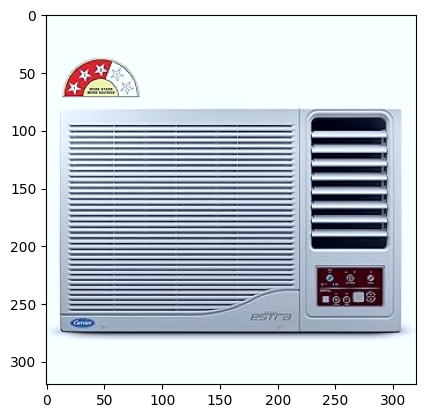

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


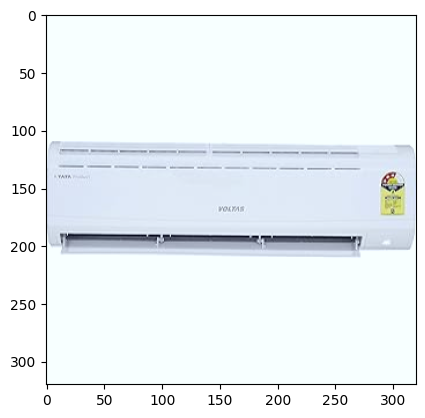

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


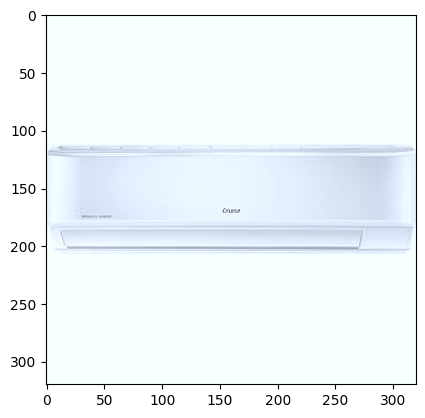

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


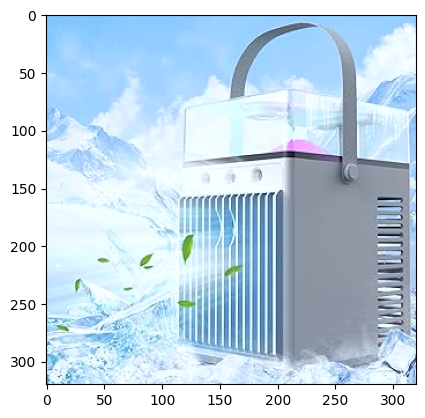

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


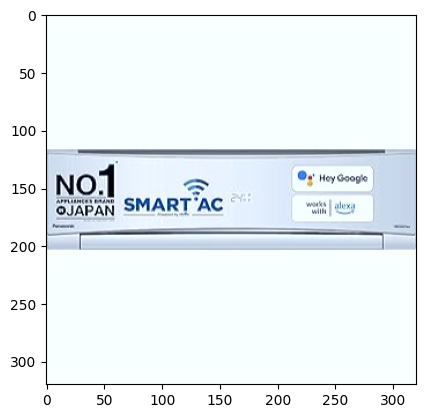

In [242]:
for x,y in val_loader:
    x = x
    y = y
    break

import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow((x[i]*0.229+0.456).permute(1,2,0))
    plt.show()

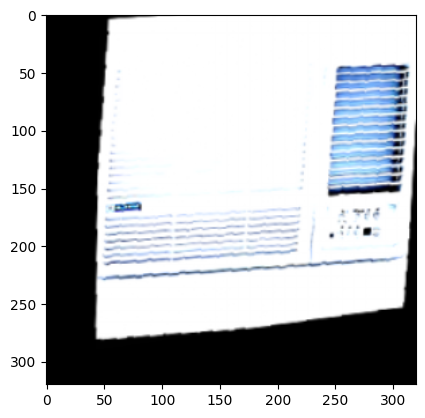

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


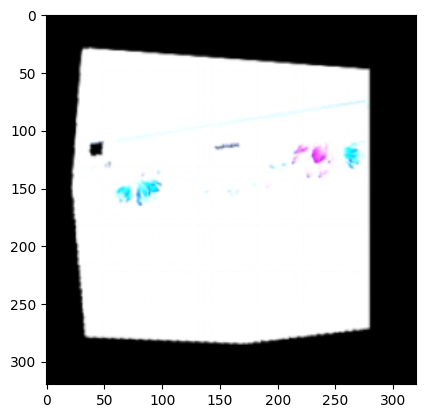

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


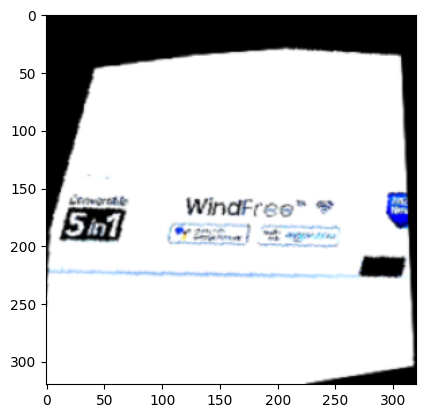

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


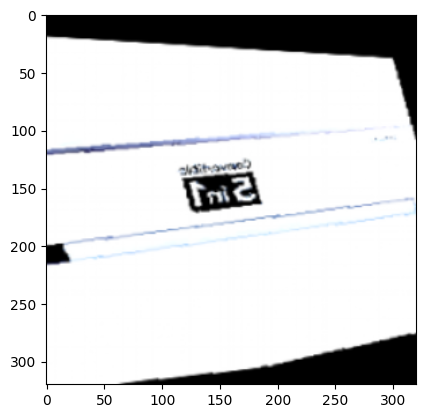

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


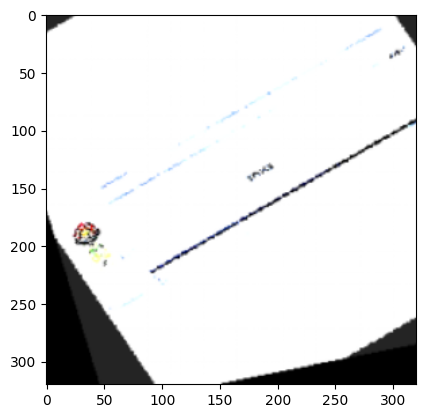

In [243]:
for x,y in train_loader:
    x = x
    y = y
    break

import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(x[i].permute(1,2,0))
    plt.show()

# Define Model

In [71]:
class paper(nn.Module):
   

    def __init__(self):
        
        super(paper, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=3),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=3),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=3),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=4, stride=4),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 1)
        )


    def forward(self, x):
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

class CNN(nn.Module):
   

    def __init__(self):
        
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, padding=1),
            nn.BatchNorm2d(6),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=1),
            nn.BatchNorm2d(12),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=24, out_channels=24, kernel_size=3, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.3),
            # nn.Linear(4704, 9600),
            # nn.ReLU(inplace=True),
            # nn.Linear(5000, 9600),
            # nn.ReLU(inplace=True),
            # nn.Dropout(p=0.3),
            nn.Linear(9600, 4800),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(4800, 3000),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(3000, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(128, 1)
        )


    def forward(self, x):
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

# Train Model

In [72]:
# Early Stopping test
def train_loop(dataloader,val_loader, model, criterion, optimizer, L1 = 0):

    train_loss, correct = 0, 0
    val_loss, val_correct = 0, 0

    for i, batch in enumerate(dataloader):
        model.train() # not required for this example but good to know

        # Number of training records
        size = len(dataloader.dataset)
        num_batches = len(dataloader)

        # Compute prediction and loss
        X, y = batch

        # X = X.to(device)
        # y = y.to(device)

        y = y.float()
        y = y.reshape(-1,1)
        
        y_pred = model.forward(X)
        y_pred = y_pred.float()
        loss = criterion(y_pred, y) + L1*sum([p.abs().sum() for p in model.parameters()])
        # correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
        
        # Backpropagation
        loss.backward()

        train_loss += loss.item()

        # Gradient step and zero gradients
        optimizer.step()
        optimizer.zero_grad()



    with torch.no_grad():
        for X, y in val_loader:
            
            # X = X.to(device)
            # y = y.to(device)            

            size_val = len(val_loader.dataset)
            num_batches_val = len(val_loader)


            y = y.float()
            y = y.reshape(-1,1)

            y_pred = model(X)
            val_loss += (criterion(y_pred, y)).item()

            # Finds argmax from softmax function output and checks if the idx 
            # of the argmax matches the idx of the target variable y
            # val_correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()

    avg_loss = train_loss/num_batches
    # avg_acc = correct/size

    avg_loss_val = val_loss / num_batches_val
    # avg_acc_val = val_correct / size_val

    return avg_loss, avg_loss_val 
            
def test_loop(dataloader, model, criterion):

    # Set the model to evaluation mode - important for batch normalization and 
    # dropout layers. Unnecessary in this situation but added for best practices
    model.eval()

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are 
    # computed during test mode also serves to reduce unnecessary gradient 
    # computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:

            # X = X.to(device)
            # y = y.to(device)
            
            y = y.float()
            y = y.reshape(-1,1)
            y_pred = model(X)
            test_loss += (criterion(y_pred, y)).item()


    avg_loss = test_loss/num_batches

    return avg_loss
    

import matplotlib.pyplot as plt
from IPython import display

def plot_training(train_loss, val_loss, test_loss):
    fig = plt.figure(1, figsize=(6, 6))
    plt.clf()

    ax1 = fig.add_subplot(1, 1, 1) # (Rows, Columns, Position)
    epochs = [int(i+1) for i in range(len(train_loss))]

    ax1.set_title('Training and Testing Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (MSE)')
    ax1.plot(epochs, train_loss, label='Train Loss', marker='o', linestyle=':')
    ax1.plot(epochs, test_loss, label='Test Loss', marker='o', linestyle=':')
    ax1.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle=':')
    ax1.legend()
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [214]:
import numpy as np

LR = 0.01
EPOCH = 30
L2 = 0.001
L1 = 0

model = paper()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=L2)
# scheduler = ExponentialLR(optimizer, gamma=0.9)

best_val_loss = float('inf')
patience = 10  # Set the patience for early stopping

train_loss = []
train_acc = []
val_loss = []
val_acc = []
test_loss = []
test_acc = []

for e in range(EPOCH):
    
    epoch_train_loss, epoch_val_loss = train_loop(train_loader, val_loader, model, criterion, optimizer,L1 = L1)
    train_loss.append(epoch_train_loss)
    val_loss.append(epoch_val_loss)

    epoch_test_loss =  test_loop(test_loader, model, criterion)
    test_loss.append(epoch_test_loss)
    # scheduler.step()
    print('Epoch {}'.format(e+1), "Epoch Validation Loss",np.sqrt(epoch_val_loss), "Epoch Train Loss",np.sqrt(epoch_train_loss))
    # Early stopping check
    # if epoch_val_loss < best_val_loss:
    #     best_val_loss = epoch_val_loss
    #     consecutive_no_improvement = 0
    # else:
    #     consecutive_no_improvement += 1

    # if consecutive_no_improvement >= patience:
    #     print(f'Early stopping at epoch {e+1} due to no improvement in validation loss.')
    #     break


Epoch 1 Epoch Validation Loss 37708.985030095944 Epoch Train Loss 43878.474844354685
Epoch 2 Epoch Validation Loss 36602.274027715815 Epoch Train Loss 42913.48021309854
Epoch 3 Epoch Validation Loss 33979.08909903266 Epoch Train Loss 39533.27793138333
Epoch 4 Epoch Validation Loss 29823.484437603867 Epoch Train Loss 34687.125296474675
Epoch 5 Epoch Validation Loss 24160.283442045955 Epoch Train Loss 27301.95870873248
Epoch 6 Epoch Validation Loss 19259.713601193554 Epoch Train Loss 19416.55973647237
Epoch 7 Epoch Validation Loss 17783.829059007512 Epoch Train Loss 17929.777020364752
Epoch 8 Epoch Validation Loss 16864.5400767409 Epoch Train Loss 19123.080295810087
Epoch 9 Epoch Validation Loss 16216.722233546458 Epoch Train Loss 17106.008768850785
Epoch 10 Epoch Validation Loss 13058.2910061003 Epoch Train Loss 16089.11105893258
Epoch 11 Epoch Validation Loss 12004.118959757105 Epoch Train Loss 16459.6513531322
Epoch 12 Epoch Validation Loss 13030.758381613865 Epoch Train Loss 17234.49

In [204]:
torch.save(model.state_dict(), f'./{product}/model_state_dict.pth')

In [205]:
# Save Results for future use
import pickle

combined_data = {
    "train_loss": train_loss,
    "test_loss": test_loss,
    "val_loss": val_loss,
}

# Serialize data to a binary file
with open(f'./{product}/loss_paper.pkl', 'wb') as f:
    pickle.dump(combined_data, f)

In [ ]:
import pickle

with open(f'./{product}/loss_paper.pkl', 'rb') as f:
    data = pickle.load(f)

train_loss = data['train_loss']
test_loss = data['test_loss']
val_loss = data['val_loss']

# Results

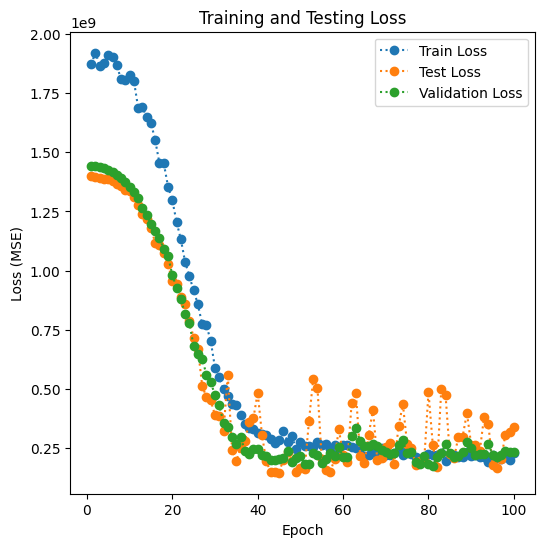

In [75]:
plot_training(train_loss,val_loss,test_loss)

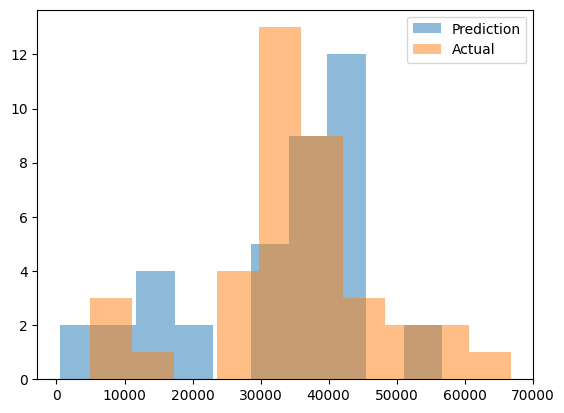

In [216]:
pred = []
actual = []

with torch.no_grad():
    for X, y in val_loader:
        
        y = y.float()
        y = y.numpy()

        
        y_pred = model(X)
        y_pred = y_pred.flatten().detach().numpy()

        pred.extend(y_pred)
        actual.extend(y)

plt.hist(pred, alpha = 0.5, label = 'Prediction')
plt.hist(actual, alpha = 0.5, label = 'Actual')
plt.legend()
plt.show()

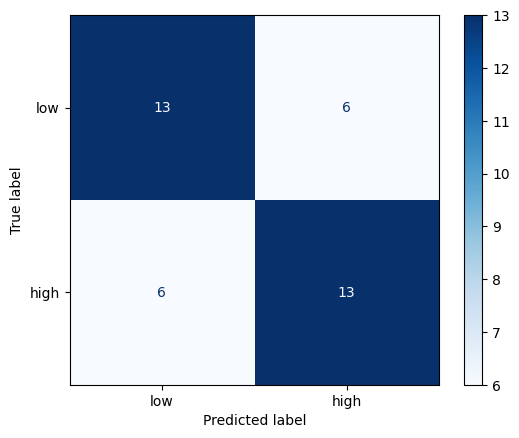

0.6842105263157895


In [219]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

pred_median = np.median(pred)
actual_median = np.median(actual)

pred_cat = ['high' if x > pred_median else 'low' for x in pred]
actual_cat = ['high' if x > actual_median else 'low' for x in actual]

# Calculate confusion matrix
cm = confusion_matrix(actual_cat, pred_cat, labels=['low', 'high'])

# Plotting using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'high'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

accuracy = accuracy_score(actual_cat, pred_cat)
print(accuracy)

In [ ]:
code_string = """

class CNN(nn.Module):
   

    def __init__(self):
        
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, padding=1),
            nn.BatchNorm2d(6),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, padding=1),
            nn.BatchNorm2d(12),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=24, out_channels=24, kernel_size=3, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(9600, 5000),
            nn.ReLU(inplace=True),
            nn.Linear(5000, 9600),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(9600, 3000),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(3000, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(128, 1)
        )


    def forward(self, x):
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x
"""

with open(f'./{product}/code.txt', 'w') as file:
    file.write(code_string)

In [131]:
import torch
import torch.nn.functional as F

first_batch_images, first_batch_labels = next(iter(train_loader))

# Extract the first image and label from the batch
first_image = first_batch_images[0]
first_label = first_batch_labels[0]
# Example image tensor of shape (1, 3, H, W)
# Let's assume a dummy image tensor for demonstration
# image_tensor = torch.randn(1, 3, 32, 32)  # Random image for demonstration
first_image_input = first_image.reshape(1,3,320,320)
image_tensor = first_image_input

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


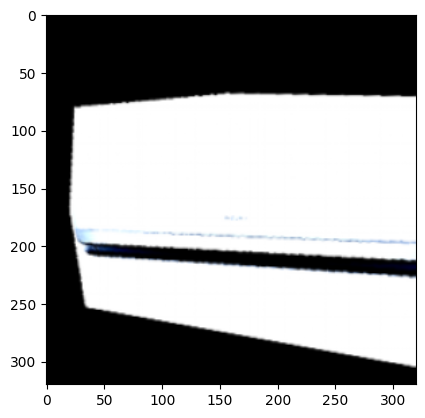

In [132]:
plt.imshow(first_image.permute(1,2,0))
plt.show()

# Still needs work done(Trying to track Machine's importance when scanning item)

In [133]:
import torch
import torch.nn.functional as F

first_batch_images, first_batch_labels = next(iter(train_loader))

# Extract the first image and label from the batch
first_image = first_batch_images[0]
first_label = first_batch_labels[0]
# Example image tensor of shape (1, 3, H, W)
# Let's assume a dummy image tensor for demonstration
# image_tensor = torch.randn(1, 3, 32, 32)  # Random image for demonstration
first_image_input = first_image.reshape(1,3,320,320)
image_tensor = first_image_input

In [137]:
import torch
import torch.nn.functional as F

first_batch_images, first_batch_labels = next(iter(train_loader))

# Extract the first image and label from the batch
first_image = first_batch_images[0]
first_label = first_batch_labels[0]
# Example image tensor of shape (1, 3, H, W)
# Let's assume a dummy image tensor for demonstration
# image_tensor = torch.randn(1, 3, 32, 32)  # Random image for demonstration
first_image_input = first_image.reshape(1,3,320,320)
image_tensor = first_image_input

# first_image_input.requires_grad_()
# saliency, _ = torch.max(first_image_input.grad.data.abs(), dim=0)
# plt.imshow(saliency.permute(1,2,0))
# plt.axis('off')
# plt.show()




torch.Size([1, 1, 318, 318])


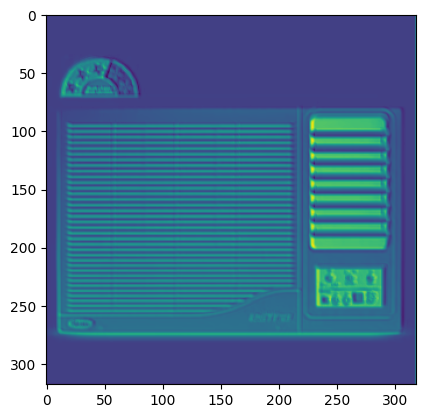

torch.Size([1, 1, 318, 318])


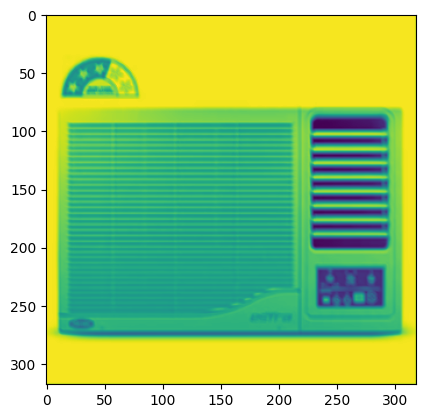

torch.Size([1, 1, 318, 318])


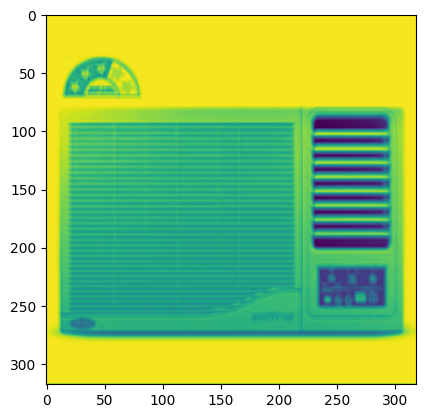

torch.Size([1, 1, 318, 318])


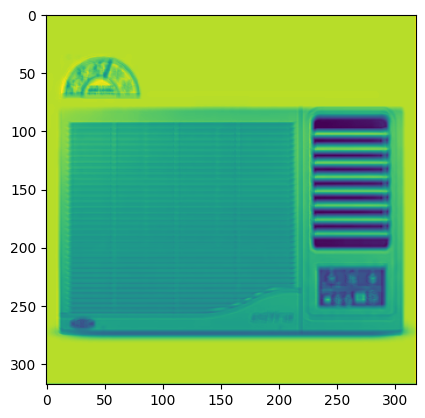

torch.Size([1, 1, 318, 318])


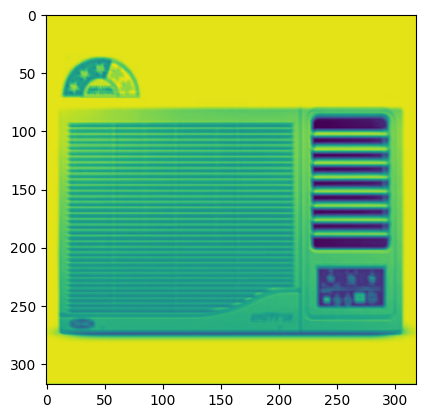

torch.Size([1, 1, 318, 318])


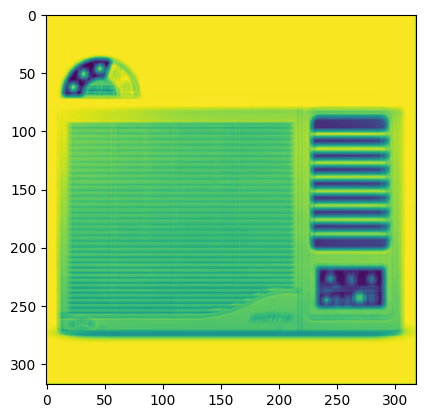

In [246]:
import torch
import torch.nn.functional as F

first_batch_images, first_batch_labels = next(iter(val_loader))

# Extract the first image and label from the batch
first_image = first_batch_images[0]
first_label = first_batch_labels[0]

first_image_input = first_image.reshape(1,3,320,320)
image_tensor = first_image_input

for i in range(6):

    layerone_kernelone = model.state_dict()['conv_layer.0.weight'][i].reshape(1,3,5,5)

    # Apply the convolution
    # No padding, stride of 1
    output = F.conv2d(image_tensor, layerone_kernelone, padding=1)
    output = output + model.state_dict()['conv_layer.0.bias'][i]

    print(output.shape)  # This will give you the shape of the output tensor

    plt.imshow(output[0,0])
    plt.show()

In [147]:
first_image.unsqueeze(0).shape

torch.Size([1, 3, 320, 320])

In [244]:
saliency.shape

(3, 320, 320)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


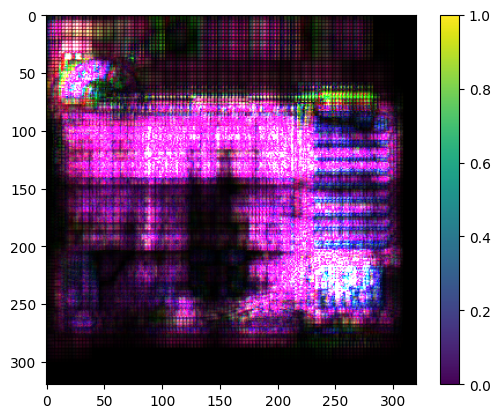

In [247]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

# Assuming `model` is your trained model and `image` is a single input image tensor
model.eval()  # Set the model to evaluation mode

# If your image isn't already a Variable, make it one with requires_grad=True
image = Variable(first_image.unsqueeze(0), requires_grad=True)

# Forward pass through the model to get the logits
output = model(image)


# Zero the existing gradients
model.zero_grad()

# Target class for which gradients should be calculated
target = output

# Backward pass to get gradients of the target class score w.r.t. input image
target.backward()

# Pull the gradients out of the image
saliency = image.grad.data

# Convert to numpy array, squeeze out the batch and channel dimension (if only one channel)
saliency = saliency.abs().squeeze().cpu().numpy()


# Plot the saliency map
plt.imshow(saliency.transpose(1,2,0))
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


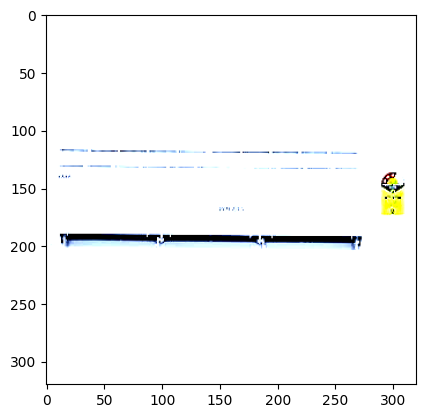

In [168]:
plt.imshow(first_image.permute(1,2,0))

In [220]:
first_image.shape

torch.Size([3, 320, 320])

In [221]:
output = model(first_image.unsqueeze(0))

# Get the final convolutional layer (assuming we know the name/position, e.g., 'conv_layer')
conv_layer = model.conv_layer

# Hook the feature extractor to grab the feature maps from the last conv layer
features = None
def hook(module, input, output):
    global features
    features = output.detach()

hook_handle = conv_layer.register_forward_hook(hook)
model(image)
hook_handle.remove()

In [223]:
features.shape

torch.Size([1, 128, 2, 2])

In [224]:
# Get the weights from the final layer used for regression prediction
params = list(model.parameters())

# Since it's regression, we'll have only one output neuron
weight_regression = np.squeeze(params[-1].data.cpu().numpy())

weight_regression

array(0.4031449, dtype=float32)

In [226]:

params[-1]

Parameter containing:
tensor([0.4031], requires_grad=True)

In [202]:
features.shape

torch.Size([1, 128, 2, 2])

In [203]:
first_image.shape

torch.Size([3, 320, 320])

In [ ]:
# Compute the activation map, similar to CAM
activation_map = weight_regression.dot(features.reshape((features.shape[1], -1)))


# Normalize the activation map to [0, 1] and reshape to the size of the feature map
activation_map = activation_map - np.min(activation_map)
activation_map = activation_map / np.max(activation_map)
activation_map = np.uint8(255 * activation_map).reshape(features.shape[2], features.shape[3])

# Resize the activation map to the size of the original image
from PIL import Image
activation_map = np.uint8(Image.fromarray(activation_map).resize((image.shape[2], image.shape[3]), Image.ANTIALIAS))/255

# Assuming 'original_img' is the original image in a format that can be overlaid (like a numpy array)
# Convert the activation map to a heatmap (optional) and overlay it onto the original image
heatmap = cv2.applyColorMap(np.uint8(255*activation_map), cv2.COLORMAP_JET)
heatmap = np.float32(heatmap) / 255
activation_on_image = heatmap + np.float32(original_img) / 255
activation_on_image = activation_on_image / np.max(activation_on_image)

# Convert to uint8 and display
activation_on_image = np.uint8(255 * activation_on_image)
plt.imshow(activation_on_image)
plt.show()

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained regression CNN model
model.eval()

# 'image' is a preprocessed input tensor with batch dimension added, e.g., shape [1, 3, H, W]

# Forward pass to get the raw prediction
output = model(first_image)

# Get the final convolutional layer (assuming we know the name/position, e.g., 'conv_layer')
conv_layer = model.conv_layer

# Hook the feature extractor to grab the feature maps from the last conv layer
features = None
def hook(module, input, output):
    global features
    features = output.detach()

hook_handle = conv_layer.register_forward_hook(hook)
model(image)
hook_handle.remove()

# Get the weights from the final layer used for regression prediction
params = list(model.parameters())
# Since it's regression, we'll have only one output neuron
weight_regression = np.squeeze(params[-1].data.cpu().numpy())

# Compute the activation map, similar to CAM
activation_map = weight_regression.dot(features.reshape((features.shape[1], -1)))

# Normalize the activation map to [0, 1] and reshape to the size of the feature map
activation_map = activation_map - np.min(activation_map)
activation_map = activation_map / np.max(activation_map)
activation_map = np.uint8(255 * activation_map).reshape(features.shape[2], features.shape[3])

# Resize the activation map to the size of the original image
from PIL import Image
activation_map = np.uint8(Image.fromarray(activation_map).resize((image.shape[2], image.shape[3]), Image.ANTIALIAS))/255

# Assuming 'original_img' is the original image in a format that can be overlaid (like a numpy array)
# Convert the activation map to a heatmap (optional) and overlay it onto the original image
heatmap = cv2.applyColorMap(np.uint8(255*activation_map), cv2.COLORMAP_JET)
heatmap = np.float32(heatmap) / 255
activation_on_image = heatmap + np.float32(original_img) / 255
activation_on_image = activation_on_image / np.max(activation_on_image)

# Convert to uint8 and display
activation_on_image = np.uint8(255 * activation_on_image)
plt.imshow(activation_on_image)
plt.show()
